# **LINEAR REGRESSION**

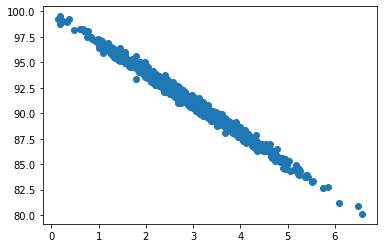

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
pagespeed=np.random.normal(3,1,1000)
purchaseamount=100-(pagespeed+np.random.normal(0,0.1,1000))*3
plt.scatter(pagespeed,purchaseamount)

In [ ]:
from scipy import stats
slope,intercept,r_value,p_value,std_error=stats.linregress(pagespeed,purchaseamount)
#scipy.stats.linregress(x, y=None, alternative='two-sided')
#Calculate a linear least-squares regression for two sets of measurements.
#slope, intercept, r, p, se = linregress(x, y)

In [ ]:
r_value**2

0.9900995069811004

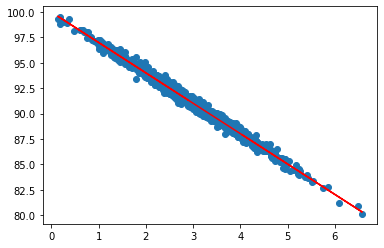

In [ ]:
def predict(x):
  return slope * x + intercept

fitline=predict(pagespeed)
plt.scatter(pagespeed,purchaseamount)
plt.plot(pagespeed,fitline,c='red')
plt.show()

# **POLYNOMIAL REGRESSION**

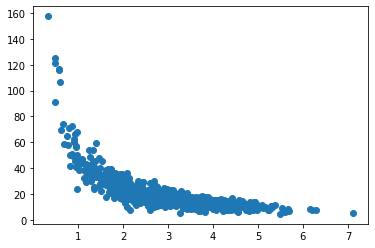

In [ ]:
np.random.seed(2)
pagespeed=np.random.normal(3,1,1000)
purchaseamount=np.random.normal(50,10,1000) / pagespeed
plt.scatter(pagespeed,purchaseamount)

In [ ]:
x=np.array(pagespeed)
y=np.array(purchaseamount)
p4=np.poly1d(np.polyfit(x,y,4)) #np.poly1d() use to define a poly func 
                                #The Numpy polyfit () method is used to fit our data inside a polynomial function.
                                #numpy.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)

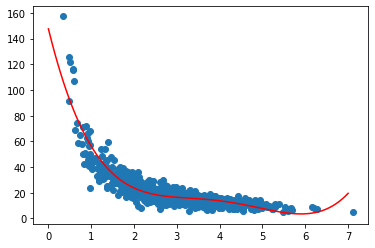

In [ ]:
xp=np.linspace(0,7,100)

plt.scatter(x,y)
plt.plot(xp,p4(xp),c='red')
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2=r2_score(y,p4(x))
print(r2)

0.8293766396303073


# **MULTI-VARIATE REGRESSION**

In [ ]:
import pandas as pd
df =pd.read_excel('pro.xlsx')

In [ ]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [ ]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X= df[['high','low','close']]
Y= df['open']
X[['high','low','close']]=scale.fit_transform(X[['high','low','close']].values)
est=sm.OLS(Y,X).fit()
est.summary()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3076: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer((slice(None), indexer), value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3041: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   open   R-squared (uncentered):                   0.100
Model:                            OLS   Adj. R-squared (uncentered):              0.091
Method:                 Least Squares   F-statistic:                              11.00
Date:                Thu, 27 Jan 2022   Prob (F-statistic):                    7.21e-07
Time:                        16:31:35   Log-Likelihood:                         -1354.2
No. Observations:                 299   AIC:                                      2714.
Df Residuals:                     296   BIC:                                      2725.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
high           6.2021     29.629      0.209      0.834     -52.108      64.512
low            4.5367     32.211      0.141      0.888     -58.855      67.929
close         -3.2509     36.838     -0.088      0.930     -75.749      69.247
==============================================================================
Omnibus:                       38.791   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              272.849
Skew:                           0.059   Prob(JB):                     5.64e-60
Kurtosis:                       7.678   Cond. No.                         60.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""